In [4]:
import networkx as nx
print(nx.__version__)

3.5


Number of nodes: 5000
Number of edges: 9996
Sample size: 750

Random Node Sampling:
 Sample 1 -> nodes: 750 edges: 217
 Sample 2 -> nodes: 750 edges: 188

Random Edge Sampling:
 Sample 1 -> nodes: 751 edges: 439
 Sample 2 -> nodes: 751 edges: 441


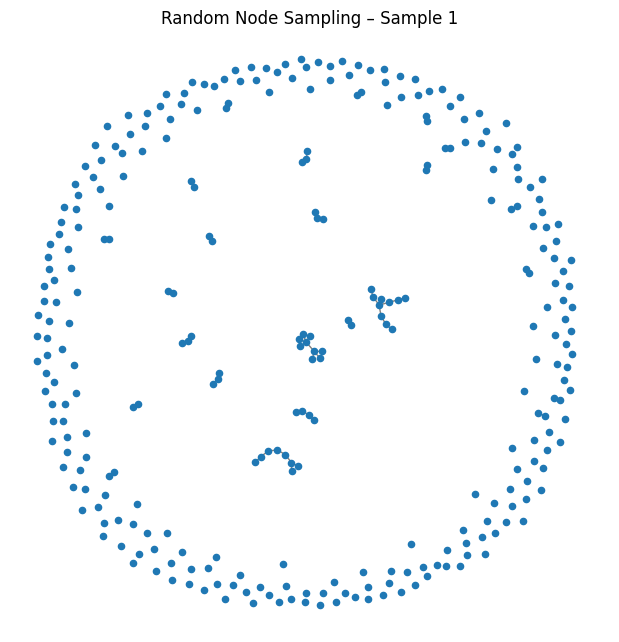

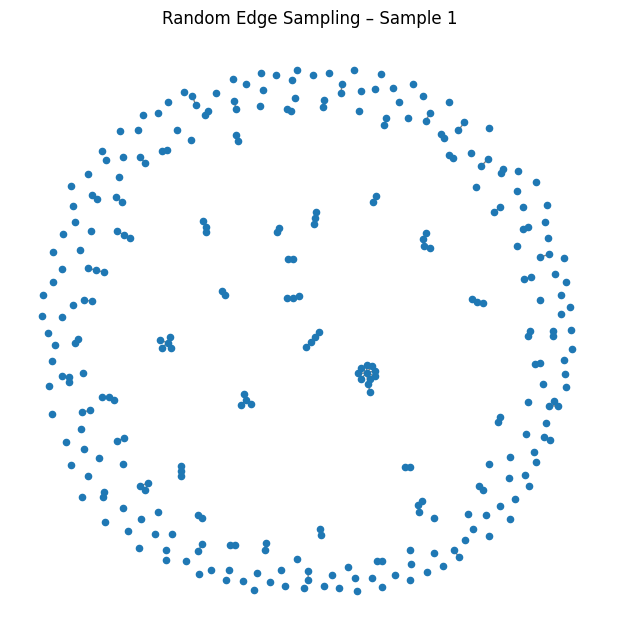

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Parameters
n = 5000   # number of nodes
m = 2      # edges each new node adds

# Generate Barabási–Albert graph
G = nx.barabasi_albert_graph(n, m)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# -----------------------------------------------------------
# Sampling Methods
# -----------------------------------------------------------

sample_size = int(0.15 * n)  # 15% of nodes
print("Sample size:", sample_size)

# -----------------------------------------------------------
# 1. RANDOM NODE SAMPLING (RNS)
# -----------------------------------------------------------
def random_node_sampling(G, sample_size):
    sampled_nodes = random.sample(list(G.nodes()), sample_size)
    return G.subgraph(sampled_nodes).copy()

# two independent samples
RNS_sample1 = random_node_sampling(G, sample_size)
RNS_sample2 = random_node_sampling(G, sample_size)

print("\nRandom Node Sampling:")
print(" Sample 1 -> nodes:", RNS_sample1.number_of_nodes(), "edges:", RNS_sample1.number_of_edges())
print(" Sample 2 -> nodes:", RNS_sample2.number_of_nodes(), "edges:", RNS_sample2.number_of_edges())

# -----------------------------------------------------------
# 2. RANDOM EDGE SAMPLING (RES)
# -----------------------------------------------------------
def random_edge_sampling(G, sample_size):
    # determine number of edges needed to approx. sample_size nodes
    edges = list(G.edges())
    random.shuffle(edges)

    sampled_edges = []
    sampled_nodes = set()

    for u, v in edges:
        sampled_edges.append((u, v))
        sampled_nodes.update([u, v])
        if len(sampled_nodes) >= sample_size:
            break

    H = nx.Graph()
    H.add_nodes_from(sampled_nodes)
    H.add_edges_from(sampled_edges)
    return H

# two independent samples
RES_sample1 = random_edge_sampling(G, sample_size)
RES_sample2 = random_edge_sampling(G, sample_size)

print("\nRandom Edge Sampling:")
print(" Sample 1 -> nodes:", RES_sample1.number_of_nodes(), "edges:", RES_sample1.number_of_edges())
print(" Sample 2 -> nodes:", RES_sample2.number_of_nodes(), "edges:", RES_sample2.number_of_edges())

# -----------------------------------------------------------
# Optional: visualize one sample per method (small subset)
# -----------------------------------------------------------

def visualize_sample(H, title):
    plt.figure(figsize=(6, 6))
    nx.draw_spring(H, node_size=20, edge_color="gray")
    plt.title(title)
    plt.show()

# visualize smaller subgraphs (only 300 nodes)
visualize_sample(nx.subgraph(RNS_sample1, list(RNS_sample1.nodes())[:300]),
                 "Random Node Sampling – Sample 1")

visualize_sample(nx.subgraph(RES_sample1, list(RES_sample1.nodes())[:300]),
                 "Random Edge Sampling – Sample 1")

In [2]:
!pip install littleballoffur --upgrade

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cython-3.2.1-cp313-cp313-win_amd64.whl.metadata (6.8 kB)
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 5.2/5.2 MB 35.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   ----------------- ---------------------- 16.8/38.9 MB 84.0 MB/s eta 0:00:01
   ---------------------------------- ----- 33.6/38.9 MB 82.9 MB/s eta 0:00:01
   -------------

  DEPRECATION: Building 'littleballoffur' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'littleballoffur'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2654 lines of output]
  <string>:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  C:\Users\PAL0343\AppData\Local\Temp\pip-build-env-pe7ssoyn\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  


In [5]:
!python --version

Python 3.13.5



Forest Fire Sampling:
 Sample 1 -> nodes: 750 edges: 1071
 Sample 2 -> nodes: 4 edges: 3


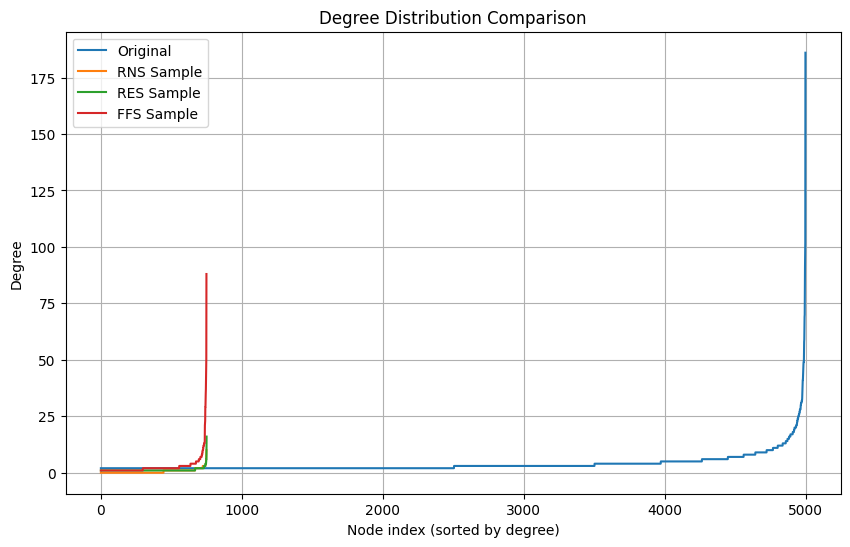

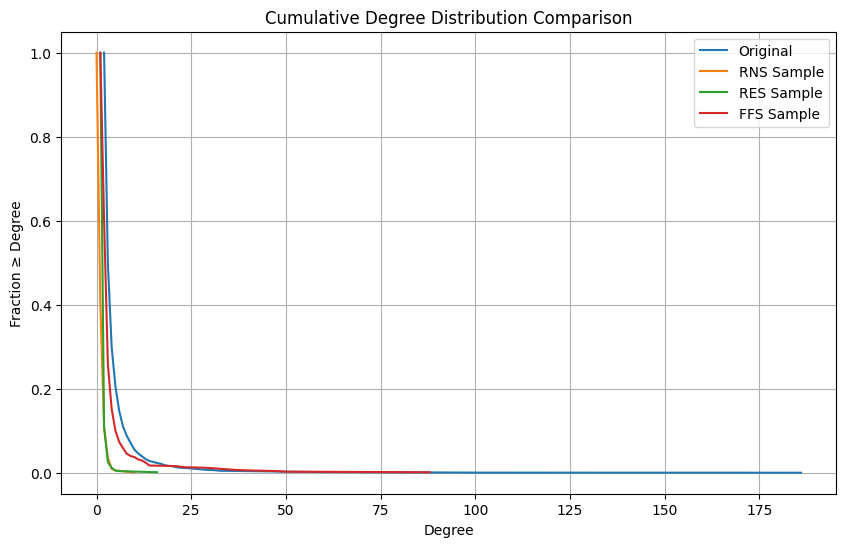

In [7]:
# -----------------------------------------------------------
# 3. FOREST FIRE SAMPLING (FFS)
# -----------------------------------------------------------
def forest_fire_sample(G, sample_size, p=0.35):  
    # p = forward burning probability (simplified FFS)
    import random
    start = random.choice(list(G.nodes()))
    visited = set([start])
    queue = [start]

    while queue and len(visited) < sample_size:
        cur = queue.pop(0)

        neighbors = list(G.neighbors(cur))
        random.shuffle(neighbors)

        # burn neighbors with prob p
        burned = [nb for nb in neighbors if random.random() < p]

        for nb in burned:
            if nb not in visited:
                visited.add(nb)
                queue.append(nb)

        if len(visited) >= sample_size:
            break

    return G.subgraph(visited).copy()


# two independent forest fire samples
FFS_sample1 = forest_fire_sample(G, sample_size)
FFS_sample2 = forest_fire_sample(G, sample_size)

print("\nForest Fire Sampling:")
print(" Sample 1 -> nodes:", FFS_sample1.number_of_nodes(), "edges:", FFS_sample1.number_of_edges())
print(" Sample 2 -> nodes:", FFS_sample2.number_of_nodes(), "edges:", FFS_sample2.number_of_edges())


# -----------------------------------------------------------
# Degree distribution helper functions
# -----------------------------------------------------------
def degree_distribution(G):
    degs = [d for _, d in G.degree()]
    return sorted(degs)

def cumulative_distribution(degrees):
    n = len(degrees)
    return [sum(d >= x for d in degrees) / n for x in degrees]


# -----------------------------------------------------------
# VISUAL COMPARISON OF DEGREE DISTRIBUTIONS
# -----------------------------------------------------------

# Prepare degree lists
orig_deg = degree_distribution(G)
rns_deg = degree_distribution(RNS_sample1)
res_deg = degree_distribution(RES_sample1)
ffs_deg = degree_distribution(FFS_sample1)

# Cumulative versions
orig_cum = cumulative_distribution(orig_deg)
rns_cum  = cumulative_distribution(rns_deg)
res_cum  = cumulative_distribution(res_deg)
ffs_cum  = cumulative_distribution(ffs_deg)


# -----------------------------------------------------------
# Plot 1: Degree Distribution
# -----------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(orig_deg, label="Original")
plt.plot(rns_deg, label="RNS Sample")
plt.plot(res_deg, label="RES Sample")
plt.plot(ffs_deg, label="FFS Sample")
plt.title("Degree Distribution Comparison")
plt.xlabel("Node index (sorted by degree)")
plt.ylabel("Degree")
plt.legend()
plt.grid(True)
plt.show()


# -----------------------------------------------------------
# Plot 2: Cumulative Degree Distribution
# -----------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(orig_deg, orig_cum, label="Original")
plt.plot(rns_deg, rns_cum, label="RNS Sample")
plt.plot(res_deg, res_cum, label="RES Sample")
plt.plot(ffs_deg, ffs_cum, label="FFS Sample")
plt.title("Cumulative Degree Distribution Comparison")
plt.xlabel("Degree")
plt.ylabel("Fraction ≥ Degree")
plt.legend()
plt.grid(True)
plt.show()
